# House Price Prediction

## Description

This project consists in creating different single predictive linear regression models in order to find a house sale price using:

**y = f(x) =  mx +b**

**Where:**
- y = dependent variable
- x = independent variable
- m = slope
- b = intercept

**"x"** and **"y"** will be part of the house dataset, and **"m"** and **"b"** will help us find the predicted value of the house. This means that **"m"** and **"b"** are the parameters of the model.

For the model to be able to predict house prices, these values and parameters are needed:
- y = Sale price of a house.
- x = A characteristic of some house.
- yhat = f(x) = estimated sale price of the house.
- m = slope needed to estimate sale price.
- b = intercept needed to estimate sale price.

The project will gather three different models as described below:
1. (A) Sale price prediction using y = f(x) = mx + b
2. (B) Base model of scikit-learn for linear regression
3. (C) The average of the two models described in 1 and 2

## Libraries

The following libraries are used in this project:

| Librería       | Descripción                                        |
|----------------|----------------------------------------------------|
| numpy          | Data wrangling, operations and data structures     |
| scikit-learn   | For the linear regression model                    |
| matplotlib     | Data visualization                                 |
| seaborn        | Data visualization                                 |

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## House prices dataset

This dataset contains the prices and characteristics of some houses.

**Description:**
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

- OverallQual: Overall material and finish quality, rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
          
- 1stFlrSF: First Floor square feet
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- YearBuilt: Original construction date
- LotFrontage: Linear feet of street connected to property



In [4]:
df = np.load(file = 'proyecto_training_data.npy')

In [5]:
df

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

## Train and test data

The dataset will be split into two:
- Train(will have 80% of the data)
- Test (will have 20% of the data)

The **Train** dataset will be used to find **"m"** and **"b"** for the model and the **Test** dataset will be used to compare **"yhat"** (predicted sale price) and **"y"** the actual sale price.

In [6]:
train = {
    "SalePrice": np.array(df[0:int(len(df)*0.80),0]),
    "OverallQual": np.array(df[0:int(len(df)*0.80),1]),
    "1stFlrSF": np.array(df[0:int(len(df)*0.80),2]),
    "TotRmsAbvGrd": np.array(df[0:int(len(df)*0.80),3]),
    "YearBuilt": np.array(df[0:int(len(df)*0.80),4]),
    "LotFrontage": np.array(df[0:int(len(df)*0.80),5])
}
test = {
    "SalePrice": np.array(df[int(len(df)*0.80):len(df),0]),
    "OverallQual": np.array(df[int(len(df)*0.80):len(df),1]),
    "1stFlrSF": np.array(df[int(len(df)*0.80):len(df),2]),
    "TotRmsAbvGrd": np.array(df[int(len(df)*0.80):len(df),3]),
    "YearBuilt": np.array(df[int(len(df)*0.80):len(df),4]),
    "LotFrontage": np.array(df[int(len(df)*0.80):len(df),5])
}

## Exploratory data analysis (EDA)

Finding the mean, min value, max value, range and standard deviation:

In [135]:
stats = []
for i in train.keys():
    stats = np.hstack((stats,[{"Variable": i,
                          "Mean": np.round(np.nanmean(train[i]),2),
                          "Max": np.round(np.nanmax(train[i]),2),
                          "Min": np.round(np.nanmin(train[i]),2),
                          "Range": np.round(np.nanmax(train[i]) - np.nanmin(train[i]),2),
                          "Std": np.round(np.nanstd(train[i]),2)}]))
stats

array([{'Variable': 'SalePrice', 'Mean': 180590.28, 'Max': 755000.0, 'Min': 34900.0, 'Range': 720100.0, 'Std': 78781.95},
       {'Variable': 'OverallQual', 'Mean': 6.1, 'Max': 10.0, 'Min': 1.0, 'Range': 9.0, 'Std': 1.38},
       {'Variable': '1stFlrSF', 'Mean': 1156.32, 'Max': 3228.0, 'Min': 334.0, 'Range': 2894.0, 'Std': 373.62},
       {'Variable': 'TotRmsAbvGrd', 'Mean': 6.49, 'Max': 14.0, 'Min': 2.0, 'Range': 12.0, 'Std': 1.61},
       {'Variable': 'YearBuilt', 'Mean': 1971.45, 'Max': 2010.0, 'Min': 1875.0, 'Range': 135.0, 'Std': 29.94},
       {'Variable': 'LotFrontage', 'Mean': 69.95, 'Max': 313.0, 'Min': 21.0, 'Range': 292.0, 'Std': 23.47}],
      dtype=object)

### Distplots

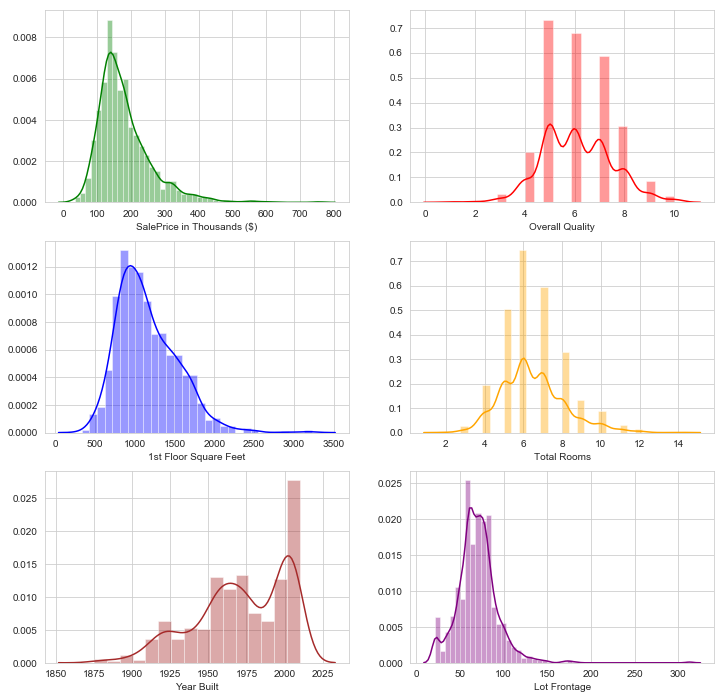

In [155]:
plt.figure(figsize=(12,12))
sns.set_style("whitegrid")
plt.subplot(3,2,1)
sns.distplot(train['SalePrice']/1000, color="green", axlabel="SalePrice in Thousands ($)")
plt.subplot(3,2,2)
sns.distplot(train['OverallQual'], color="red", axlabel="Overall Quality")
plt.subplot(3,2,3)
sns.distplot(train['1stFlrSF'], color="blue", axlabel="1st Floor Square Feet")
plt.subplot(3,2,4)
sns.distplot(train['TotRmsAbvGrd'], color="orange", axlabel="Total Rooms")
plt.subplot(3,2,5)
sns.distplot(train['YearBuilt'], color="brown", axlabel="Year Built")
plt.subplot(3,2,6)
sns.distplot(train['LotFrontage'][~np.isnan(train['LotFrontage'])], color="purple", axlabel="Lot Frontage")

### Correlations

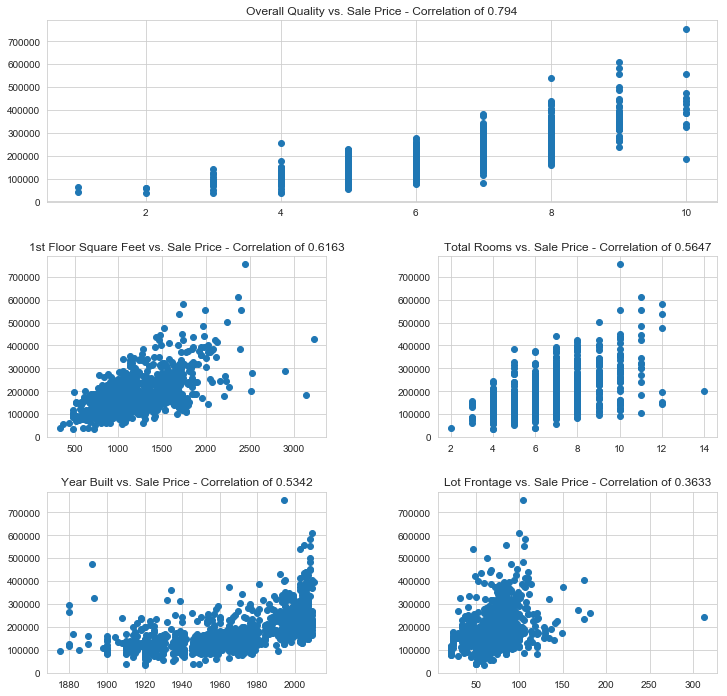

In [9]:
plt.figure(figsize=(12,12))
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0:])
plt.scatter(x=train['OverallQual'], y=train['SalePrice'])
plt.title('Overall Quality vs. Sale Price - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['OverallQual'], y=train['SalePrice'])[0,1],4)))
plt.subplot(grid[1, 0])
plt.scatter(x=train['1stFlrSF'], y=train['SalePrice'])
plt.title('1st Floor Square Feet vs. Sale Price - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['1stFlrSF'], y=train['SalePrice'])[0,1],4)))
plt.subplot(grid[1, 1])
plt.scatter(x=train['TotRmsAbvGrd'], y=train['SalePrice'])
plt.title('Total Rooms vs. Sale Price - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['TotRmsAbvGrd'], y=train['SalePrice'])[0,1],4)))
plt.subplot(grid[2, 0])
plt.scatter(x=train['YearBuilt'], y=train['SalePrice'])
plt.title('Year Built vs. Sale Price - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['YearBuilt'], y=train['SalePrice'])[0,1],4)))
plt.subplot(grid[2, 1])
plt.scatter(x=train['LotFrontage'][~np.isnan(train['LotFrontage'])], y=train['SalePrice'][~np.isnan(train['LotFrontage'])])
plt.title('Lot Frontage vs. Sale Price - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['LotFrontage'][~np.isnan(train['LotFrontage'])], y=train['SalePrice'][~np.isnan(train['LotFrontage'])])[0,1],4)))
plt.show()

We can see that there is a higher correlation **Overall Quality** and **1st Floor Square Feet** variables. These are going to be the main variables for the model.

### Model (A): Sale price prediction using y = f(x) = mx + b

For this first approach in understanding house prices, the function we're going to use is **y = f(x) = mx + b**.

The parameters of the model will be:
- **epochs:** number of iterations for the model to run
- **print_error_each:** number of times for the model to print an error
- **lr:** (Learning Rate). Will update the parameters each iteration
- **x:** independent variable (One version of the model with Overall Quality and the other one with 1st Floor Square Feet)
- **y:** dependent variable (sale price)

In [653]:
def model_a_price_prediction(epochs, print_error_each, lr, x, y):
    mat = np.array([x,np.ones(len(x))]).transpose()
    m = 1
    b = 0
    vec = np.array([m,b])
    error = np.array([])
    results = {}
    i=0
    for i in range(0,epochs):
        yhat = np.matmul(mat, vec)
        error = np.append(error,np.array([(1/2)*np.average(((y-yhat)**2))]))
        #if(np.mod(i,print_error_each)==0):
            #print("error",i,": ",error[i], sep="")
        gradient = np.matmul((yhat-y).transpose(),mat)/len(mat)
        m = m - (lr*gradient[0])
        b = b - (lr*gradient[1])
        vec = np.array([m,b])
        results[i] = np.array(vec)
    return(results,error) #agregar un parametro para elegir o siempre escribir un [0] o [1]?

In [710]:
def model_a_plot_error(dat, n):
    x = np.arange(0,len(dat[1]),n)
    y = dat[1][0::n]
    plt.plot(x,y, 'ro-')

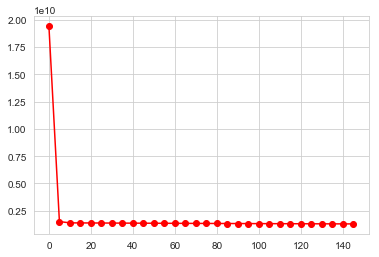

In [717]:
a = model_a_price_prediction(epochs=150,
                             print_error_each=1,
                             lr=0.04,
                             x=train['OverallQual'],
                             y=train['SalePrice'])
model_a_plot_error(a,5) #como automatizar el escribir el 150 o 0.04 arriba

array([1, 3, 5, 7, 9])